**Table of contents**<a id='toc0_'></a>    
1. [Notebook para el preprocesamiento de los datos del dataset del Titanic](#toc1_)    
1.1. [Información de las columnas del dataset](#toc1_1_)    
1.2. [Primeros pasos en el tratamiendo de los datos](#toc1_2_)    
1.2.1. [Leemos el DataFrame](#toc1_2_1_)    
1.2.2. [Corregimos los nombres de las columnas](#toc1_2_2_)    
1.2.3. [Cambiamos el nombre de las ciudades de salida de los pasajeros](#toc1_2_3_)    
1.2.4. [Cambiamos los valores de la columnas PCLASS a Primera, Segunda y Tercera y los hacemos string](#toc1_2_4_)    
1.2.5. [Cambiamos los valores nulos de la columna CABIN por Unknown](#toc1_2_5_)    
1.2.5.1. [Ordenamos la columnas PCLASS por Primera, Segunda y Tercera, porque somos clasistas hasta en el análisis de datos.](#toc1_2_5_1_)    
1.2.6. [Cambiamos los valores de la columna SURVIVED a strings](#toc1_2_6_)    
1.2.7. [Comprobamos el número de valores nulos, su porcentaje y representamos en un mapa de calor](#toc1_2_7_)    
1.2.8. [Corregimos con la moda ya que el porcentaje de valores nulos es menos que el 20% de los datos.](#toc1_2_8_)    
1.2.9. [Veamos un poco de la información que nos dan los datos para hacernos una idea de lo que tenemos para trabajar](#toc1_2_9_)    
1.3. [EXploratory Data Analysis y Profiling del dataset automáticos](#toc1_3_)    
1.3.1. [Fast EDA](#toc1_3_1_)    
1.3.2. [Pandas Profiling](#toc1_3_2_)    
1.4. [Exportamos los datos a un nuevo archivo CSV](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Notebook para el preprocesamiento de los datos del dataset del Titanic](#toc0_)

In [24]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1.1. <a id='toc1_1_'></a>[Información de las columnas del dataset](#toc0_)

| Variable | Definition                       | Key                                         |
|----------|----------------------------------|---------------------------------------------|
| survival | Survival                         | 0 = No, 1 = Yes                             |
| pclass   | Ticket class                     | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| sex      | Sex                              |                                             |
| Age      | Age in years                     |                                             |
| sibsp    | # of siblings / spouses aboard   |                                             |
| parch    | # of parents / children aboard   |                                             |
| ticket   | Ticket number                    |                                             |
| fare     | Passenger fare                   |                                             |
| cabin    | Cabin number                     |                                             |
| embarked | Port of Embarkation              | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**


- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.

## 1.2. <a id='toc1_2_'></a>[Primeros pasos en el tratamiendo de los datos](#toc0_)

### 1.2.1. <a id='toc1_2_1_'></a>[Leemos el DataFrame](#toc0_)

In [25]:
data = pd.read_csv('data/titanic.csv')
titan = pd.DataFrame(data=data)
titan

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

### 1.2.2. <a id='toc1_2_2_'></a>[Corregimos los nombres de las columnas](#toc0_)

In [26]:
titan = titan.rename(columns= lambda x: x.strip().replace(' ', '_').upper())

In [27]:
titan

PASSENGERID  SURVIVED  PCLASS  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  NAME     SEX   AGE  SIBSP  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     PARCH            TICKET     FARE CABIN EMBARKED  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

### 1.2.3. <a id='toc1_2_3_'></a>[Cambiamos el nombre de las ciudades de salida de los pasajeros](#toc0_)

In [28]:
titan['EMBARKED'] = titan['EMBARKED'].replace({'S': 'Southampton', 'C': 'Cherburgo', 'Q': 'Queenstown'})

### 1.2.4. <a id='toc1_2_4_'></a>[Cambiamos los valores de la columnas PCLASS a Primera, Segunda y Tercera y los hacemos string](#toc0_)

In [29]:
titan["PCLASS"] = titan["PCLASS"].replace({1: "Primera", 2: "Segunda", 3: "Tercera"}).astype(str)

### 1.2.5. <a id='toc1_2_5_'></a>[Cambiamos los valores nulos de la columna CABIN por Unknown](#toc0_)

In [30]:
titan['CABIN'] = titan['CABIN'].replace({np.nan: 'Unknown'})

#### 1.2.5.1. <a id='toc1_2_5_1_'></a>[Ordenamos la columnas PCLASS por Primera, Segunda y Tercera, porque somos clasistas hasta en el análisis de datos.](#toc0_)

In [31]:
pclass_order = ['Primera', 'Segunda', 'Tercera']
titan['PCLASS'] = pd.Categorical(titan['PCLASS'], categories=pclass_order, ordered=True)

### 1.2.6. <a id='toc1_2_6_'></a>[Cambiamos los valores de la columna SURVIVED a strings](#toc0_)

In [32]:
titan["SURVIVED"] = titan["SURVIVED"].replace({1: "Alive", 0: "Dead"}).astype(str)

In [33]:
titan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PASSENGERID  891 non-null    int64   
 1   SURVIVED     891 non-null    object  
 2   PCLASS       891 non-null    category
 3   NAME         891 non-null    object  
 4   SEX          891 non-null    object  
 5   AGE          714 non-null    float64 
 6   SIBSP        891 non-null    int64   
 7   PARCH        891 non-null    int64   
 8   TICKET       891 non-null    object  
 9   FARE         891 non-null    float64 
 10  CABIN        891 non-null    object  
 11  EMBARKED     889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 77.7+ KB


### 1.2.7. <a id='toc1_2_7_'></a>[Comprobamos el número de valores nulos, su porcentaje y representamos en un mapa de calor](#toc0_)

In [34]:
titan.isnull().sum()

PASSENGERID      0
SURVIVED         0
PCLASS           0
NAME             0
SEX              0
AGE            177
SIBSP            0
PARCH            0
TICKET           0
FARE             0
CABIN            0
EMBARKED         2
dtype: int64

In [35]:
def port_nulo (titan):
    for columns in titan:
        nulitos = titan.isnull().sum()/len(titan.index)*100
        return nulitos

port_nulo(titan)

PASSENGERID     0.000000
SURVIVED        0.000000
PCLASS          0.000000
NAME            0.000000
SEX             0.000000
AGE            19.865320
SIBSP           0.000000
PARCH           0.000000
TICKET          0.000000
FARE            0.000000
CABIN           0.000000
EMBARKED        0.224467
dtype: float64

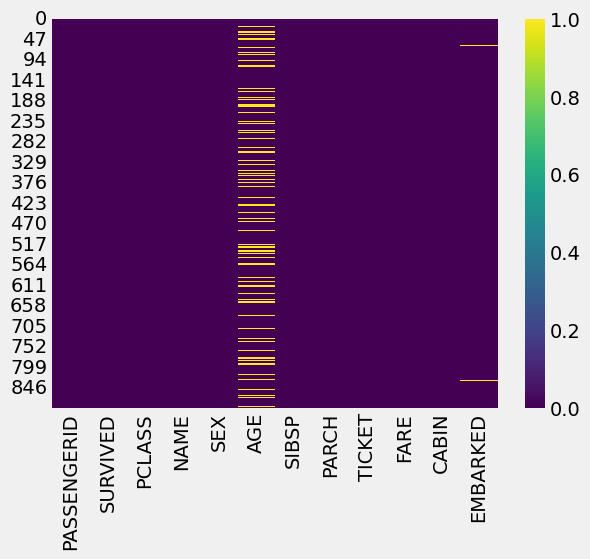

In [36]:
sns.heatmap(titan.isnull(), cmap='viridis');

### 1.2.8. <a id='toc1_2_8_'></a>[Corregimos con la moda ya que el porcentaje de valores nulos es menos que el 20% de los datos.](#toc0_)

In [37]:
titan['AGE'].fillna(titan['AGE'].mode()[0], inplace=True)

In [38]:
titan['EMBARKED'] = titan['EMBARKED'].replace({np.nan:'Southampton'})
# He buscado de dónde salió Rose Amélie Icard que era el dato que faltaba

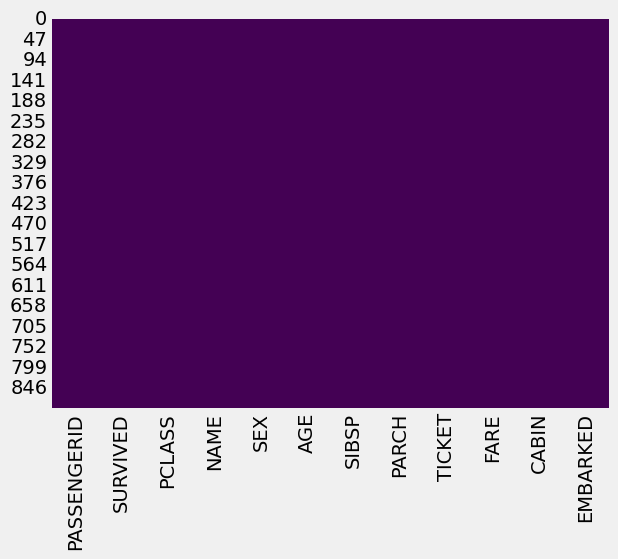

In [39]:
sns.heatmap(titan.isnull(), cmap='viridis',cbar=False);

Dejo la columna CABIN sin tocar de momento hasta que sepa qué hacer con ella.

### 1.2.9. <a id='toc1_2_9_'></a>[Veamos un poco de la información que nos dan los datos para hacernos una idea de lo que tenemos para trabajar](#toc0_)

In [40]:
titan.nunique()

PASSENGERID    891
SURVIVED         2
PCLASS           3
NAME           891
SEX              2
AGE             88
SIBSP            7
PARCH            7
TICKET         681
FARE           248
CABIN          148
EMBARKED         3
dtype: int64

In [41]:
titan['FARE'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: FARE, dtype: float64

In [42]:
titan

PASSENGERID SURVIVED   PCLASS  \
0              1     Dead  Tercera   
1              2    Alive  Primera   
2              3    Alive  Tercera   
3              4    Alive  Primera   
4              5     Dead  Tercera   
..           ...      ...      ...   
886          887     Dead  Segunda   
887          888    Alive  Primera   
888          889     Dead  Tercera   
889          890    Alive  Primera   
890          891     Dead  Tercera   

                                                  NAME     SEX   AGE  SIBSP  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  24.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     PARCH            TICKET     FARE    CABIN     EMBARKED  
0        0         A/5 21171   7.2500  Unknown  Southampton  
1        0          PC 17599  71.2833      C85    Cherburgo  
2        0  STON/O2. 3101282   7.9250  Unknown  Southampton  
3        0            113803  53.1000     C123  Southampton  
4        0            373450   8.0500  Unknown  Southampton  
..     ...               ...      ...      ...          ...  
886      0            211536  13.0000  Unknown  Southampton  
887      0            112053  30.0000      B42  Southampton  
888      2        W./C. 6607  23.4500  Unknown  Southampton  
889      0            111369  30.0000     C148    Cherburgo  
890      0            370376   7.7500  Unknown   Queenstown  

[891 rows x 12 columns]

## 1.3. <a id='toc1_3_'></a>[EXploratory Data Analysis y Profiling del dataset automáticos](#toc0_)

### 1.3.1. <a id='toc1_3_1_'></a>[Fast EDA](#toc0_)

DataFrame Head:


PASSENGERID SURVIVED   PCLASS  \
0            1     Dead  Tercera   
1            2    Alive  Primera   
2            3    Alive  Tercera   

                                                NAME     SEX   AGE  SIBSP  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   PARCH            TICKET     FARE    CABIN     EMBARKED  
0      0         A/5 21171   7.2500  Unknown  Southampton  
1      0          PC 17599  71.2833      C85    Cherburgo  
2      0  STON/O2. 3101282   7.9250  Unknown  Southampton

DataFrame Tail:


PASSENGERID SURVIVED   PCLASS                                      NAME  \
888          889     Dead  Tercera  Johnston, Miss. Catherine Helen "Carrie"   
889          890    Alive  Primera                     Behr, Mr. Karl Howell   
890          891     Dead  Tercera                       Dooley, Mr. Patrick   

        SEX   AGE  SIBSP  PARCH      TICKET   FARE    CABIN     EMBARKED  
888  female  24.0      1      2  W./C. 6607  23.45  Unknown  Southampton  
889    male  26.0      0      0      111369  30.00     C148    Cherburgo  
890    male  32.0      0      0      370376   7.75  Unknown   Queenstown

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(891, 12)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PASSENGERID  891 non-null    int64   
 1   SURVIVED     891 non-null    object  
 2   PCLASS       891 non-null    category
 3   NAME         891 non-null    object  
 4   SEX          891 non-null    object  
 5   AGE          891 non-null    float64 
 6   SIBSP        891 non-null    int64   
 7   PARCH        891 non-null    int64   
 8   TICKET       891 non-null    object  
 9   FARE         891 non-null    float64 
 10  CABIN        891 non-null    object  
 11  EMBARKED     891 non-null    object  
dtypes: category(1), float64(2), int64(3),

/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/fasteda/__init__.py:92: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_negative_red, subset = info_cols)


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

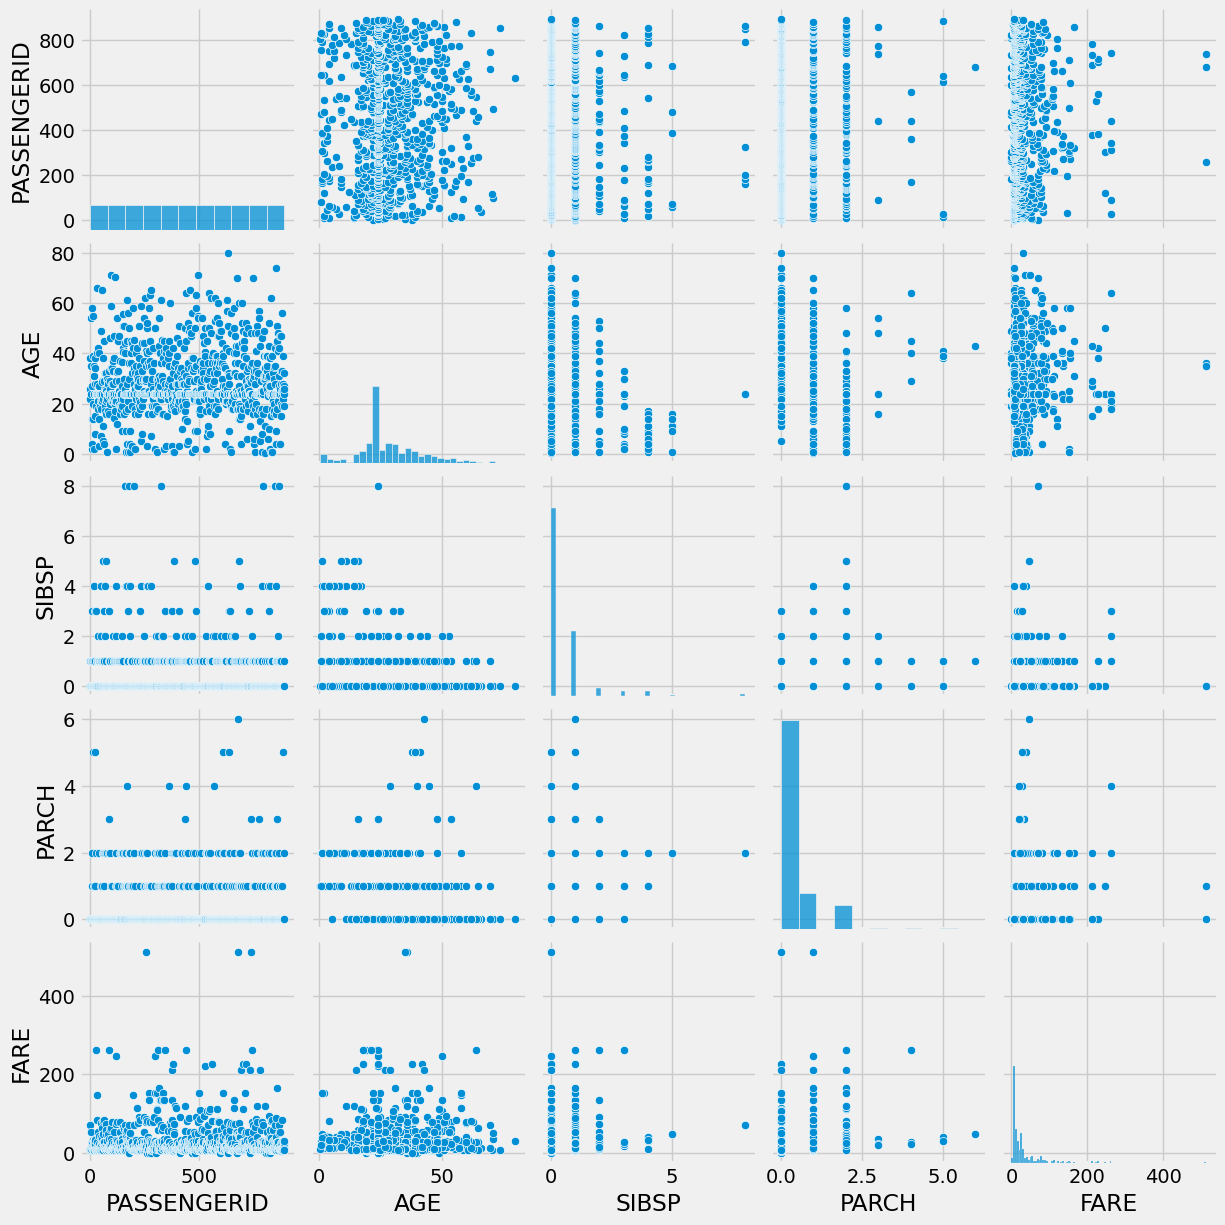

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


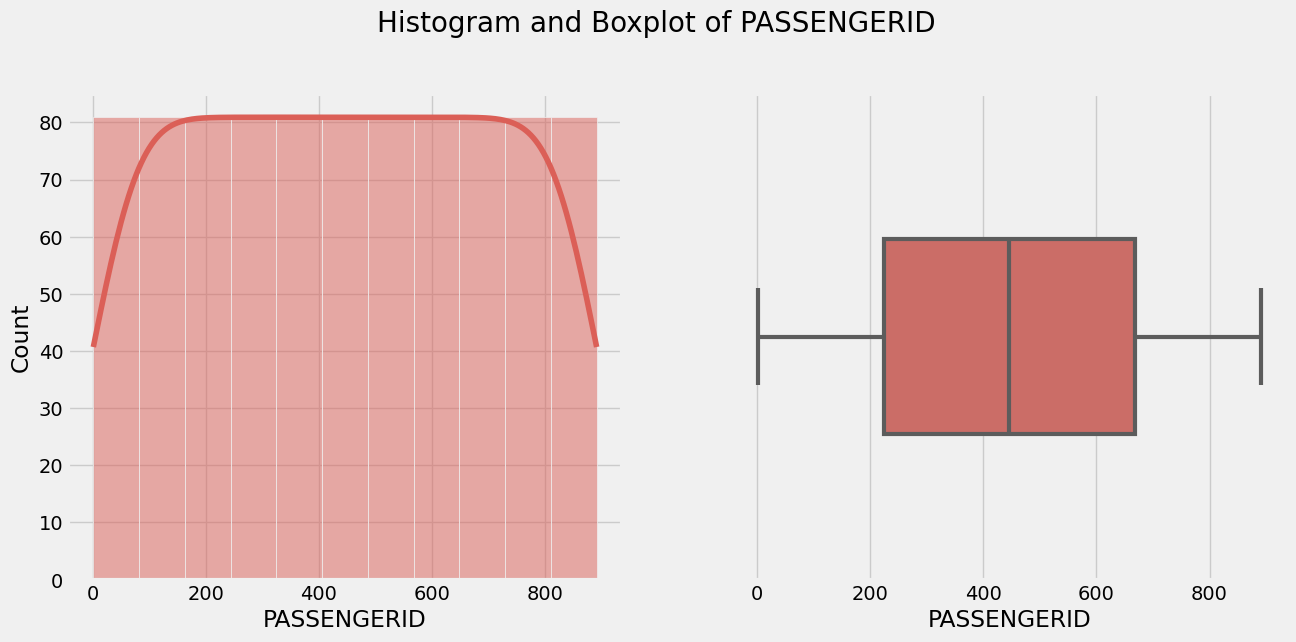

/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


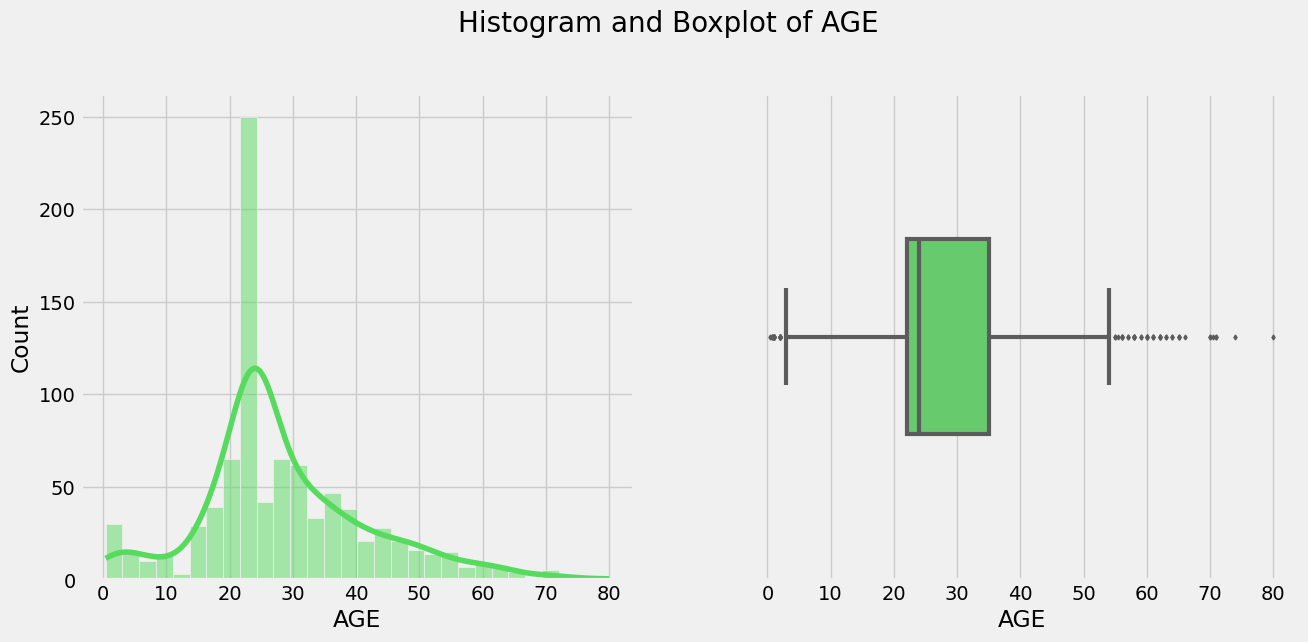

/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


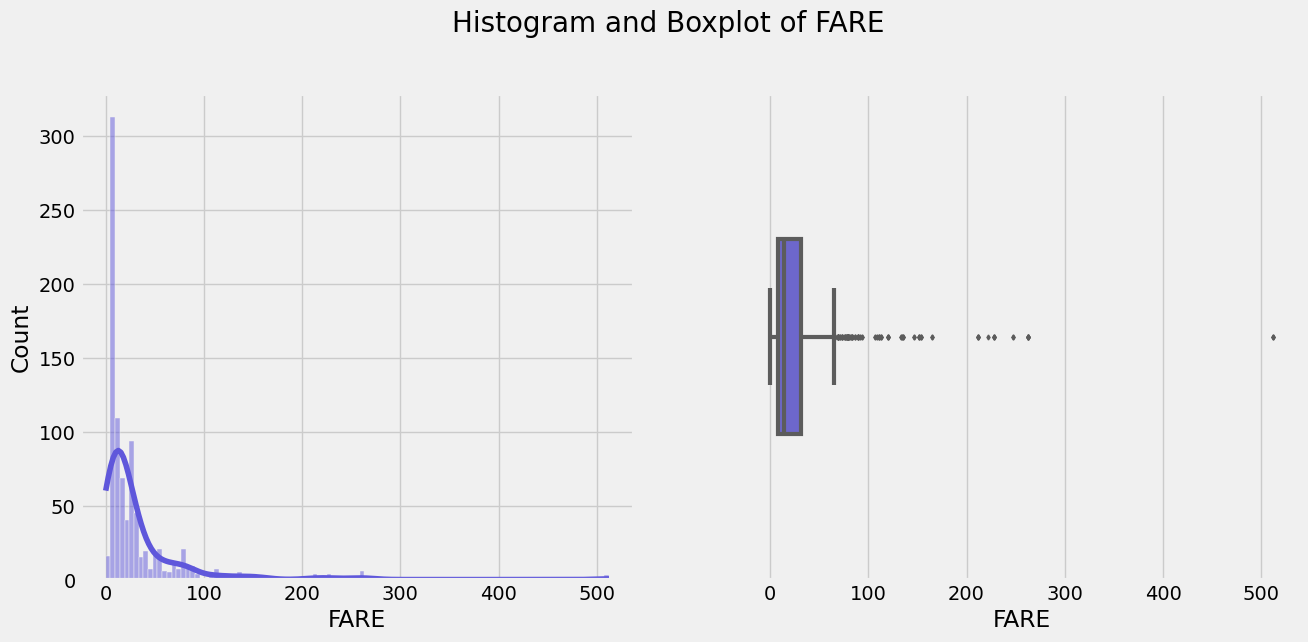

----------------------------------------------------------------------------------------------------
Countplot(s):



/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


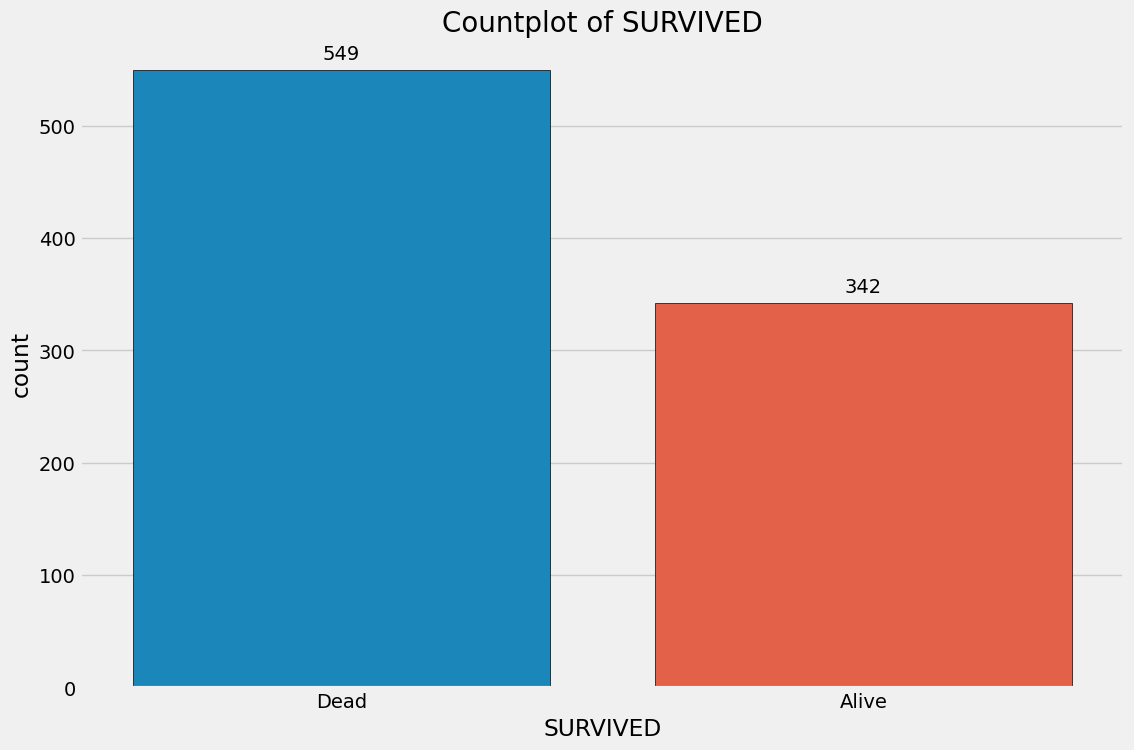

/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


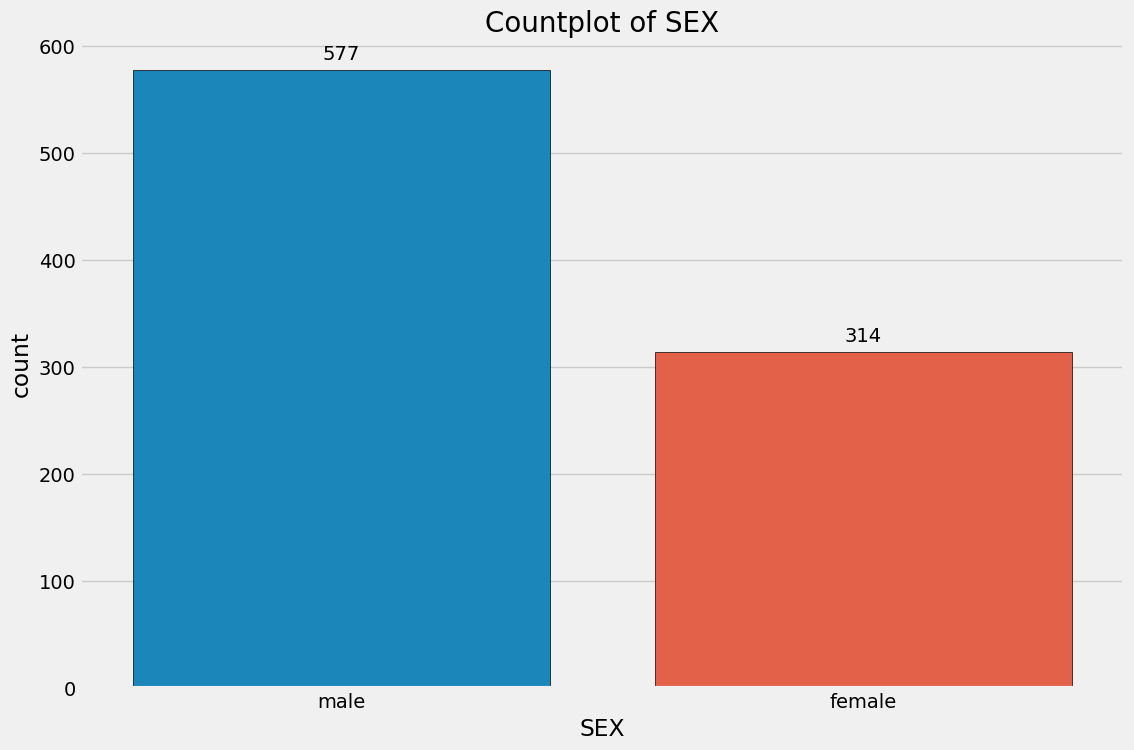

/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


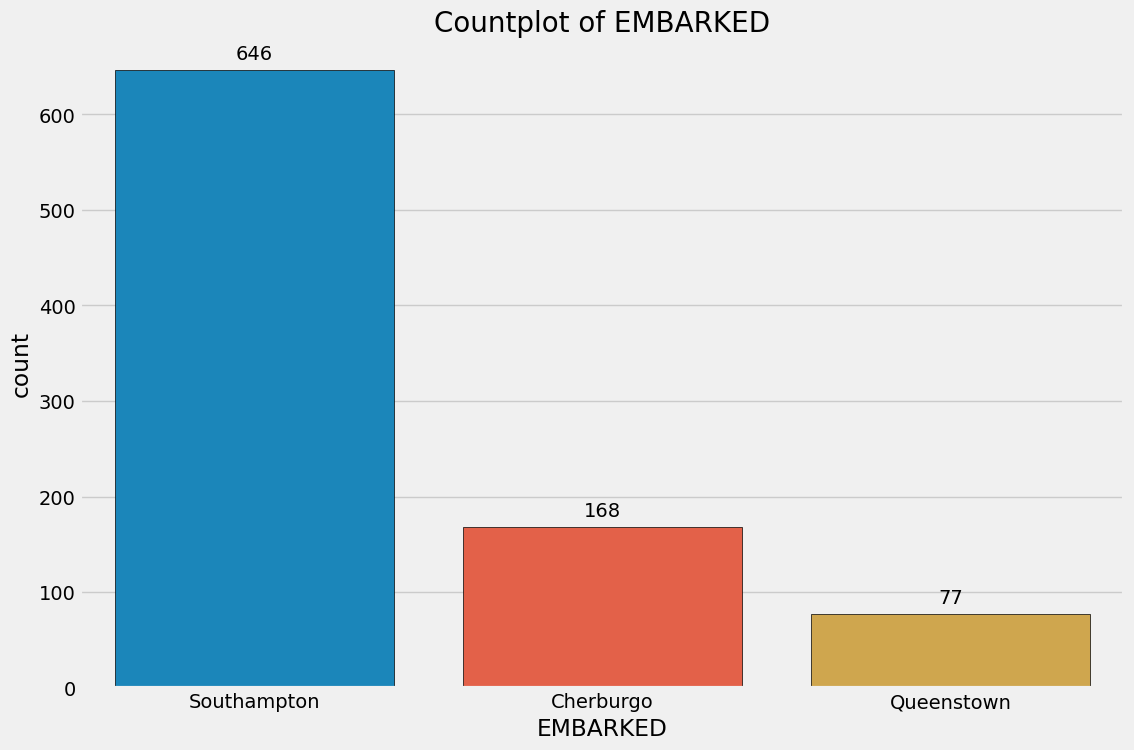

/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/fasteda/__init__.py:250: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  large_to_small = df.groupby(col).size().sort_values().index[::-1]
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

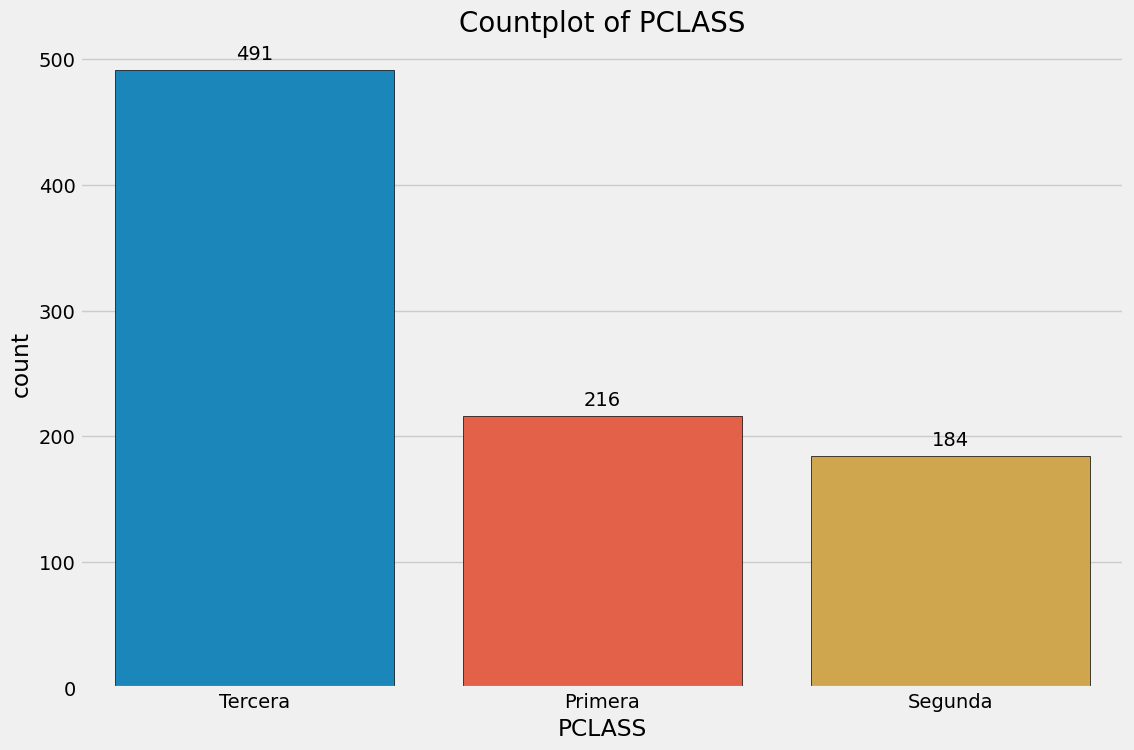

/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


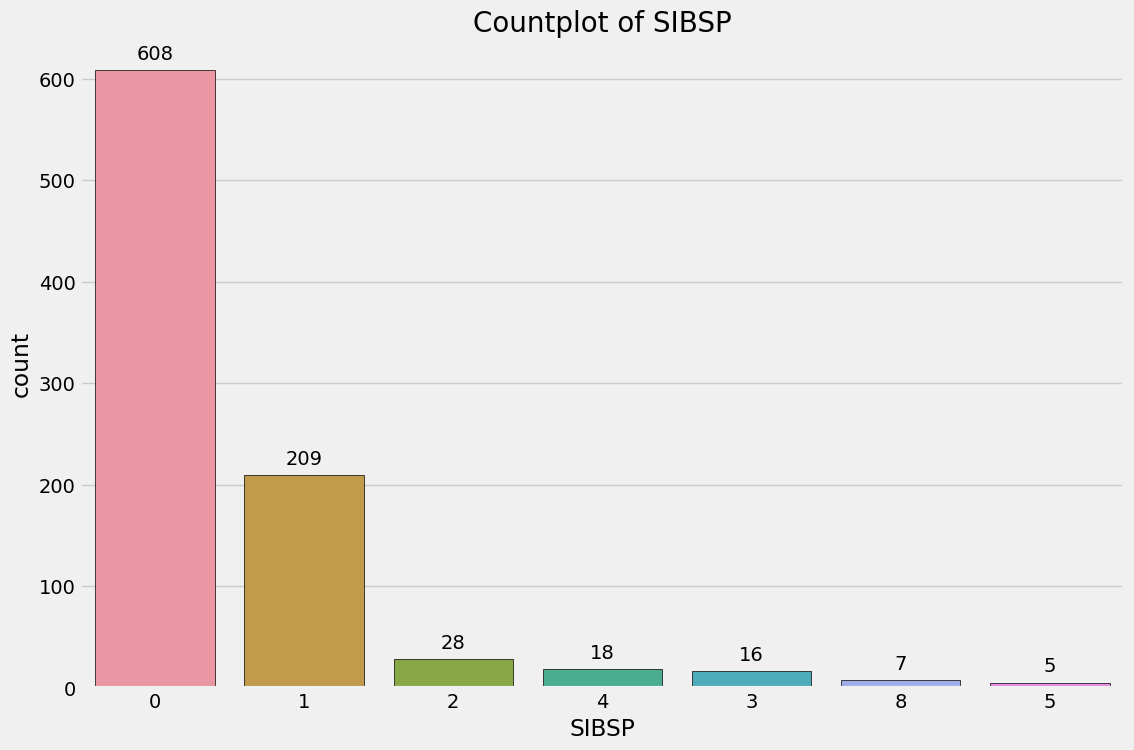

/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enriquebook/Clases_Upgrade/mi_entorno/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


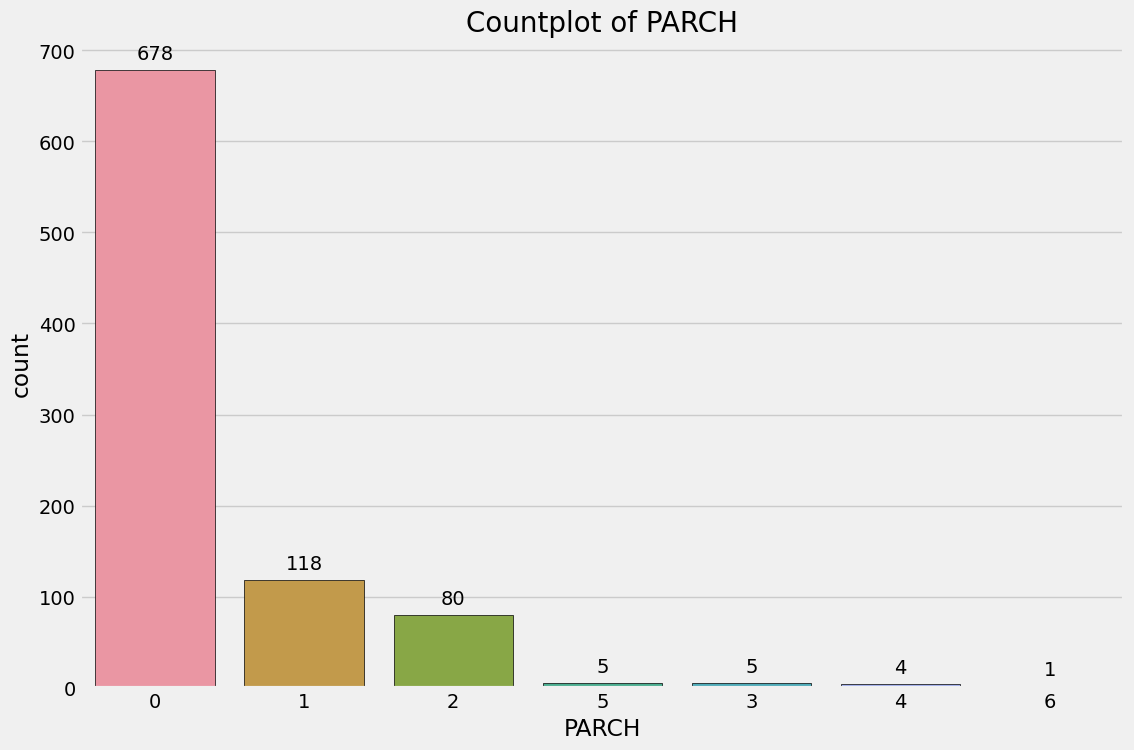

In [43]:
# pip install fasteda
from fasteda import fast_eda
fast_eda(titan, correlation=False)

### 1.3.2. <a id='toc1_3_2_'></a>[Pandas Profiling](#toc0_)

In [44]:
# pip install ydata-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(titan, title='Titanic Report', explorative=True)

In [45]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.4. <a id='toc1_4_'></a>[Exportamos los datos a un nuevo archivo CSV](#toc0_)

In [46]:
titan.to_csv('data/titanic_limpio.csv', index=False, encoding='utf-8')